<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: the first layer of nodes in a neural network, recieving the normalized or transformed version of the original data, which enters the neural network as a vector. Each node corresponds to a feature of the observation. The input layer does itself have weights, biases, and an activation function, but it only outputs activation values to the next layer. It does not recieve activation values. It only recieves the vectorized raw data.

### Hidden Layer: a layer of nodes which does not recieve inputs from the original data. It only recieves activation values from previous nodes of the neural network. However, nodes in a hidden layer also do not present a final output value from the neural network. They recieve activation values, and must also pass activation values on to other nodes in subsequent layers. Hidden layer nodes are therefore intermediating nodes. They also have weights, biases, and an activation function.

### Output Layer: a layer of nodes which does not recive input activation values from the original data, but from previous nodes in the neural network; but unlike a hidden layer, it's output activation values are the final outputs of the neural network. These output activation values are interpreted as probablilities, each node either representing a class within the target, a target itself, or some medley of the two. Nodes in the output layer also have wights, biases, and activation functions, but their output activation values are the final interpretation of the neural network upon that data observation. No further nodes recieve activation values from the output layer.

### Neuron: also known as a node, this is a function within a neural network which recieves input values either from the raw original data, or from one or more previous nodes. It applies weight coefficients and a bias intercept to those input values, and the sum of those weights and biases applied to each prior input are run through an activation function to relativize the output of the node compared to all other outputs in its layer. This final relativized output is the activation value, which is then input to one or many subsequent nodes, or is interpreted as an output value of the neural network in the case of the output layer.

### Weight: a coefficient multiplied to an input from a previous node, or the activation value from a previous node. This weight value is uniqe to the function of that node, and sometimes to the node from which it recieves the input.

### Activation Function: a function which relates the nodes that are members of the same layer. Each node being a function that presents to the activation function its weighted sum, the activation function then returns to the node an activation value that is calculated relative to all of the other nodes encapsulated by that activation function. It is that activation value that is then passed from one node to the next layer, or as an output.

### Node Map: a visual depiction of the node architecture, flow of activation values and layer membership between the nodes of a neural network. The nodes can be color coded based on layer membership, input properties, output properties, or function structure, but generally nodes in the same layer are aligned and parallel to other layers, and data moves from left to right. The leftmost layer is usually the input layer, and the rightmost layer is usually the output layer.

### Perceptron: The simplest architecture possible for a neural network. A perceptron is a neural network with no hidden layer. Data flows directly into the input layer, and then directly into the final output layer.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

## 1] The raw data is vectorized, usually into a float value from between 1 and 0.
## 2] A single observation is fed into the input layer as a vector, usually with each utilized feature being passed to a single input node.
## 3] Input nodes take the input value, multipy it by a weight, add a bias to that product, and pass that weighted sum into the activation function for the input layer.
## 4] The acivation function of the input layer uses a compression-type function to compress sometimes radically varying input values to within 1 and 0, relative to the range of other weighted sums it recieves from nodes of that layer. It then returns to the respective node its "squishified", or [1,0] compressed weighted sum (the activation value).
## 5] The node then passes its activation value on to other nodes in the next layer, as an input to that node's weight/bias function.
## 6] If the next node in the network, recieving that prior activation value, is a hidden layer node, steps 3-5 are repeated for that node and that layer, and it's activation value is passed onto one or many nodes in the subsequent layer.
## 7] If the next node in the network, recieving that prior activation value, is an output layer node, steps 3-5 are repeated for that node and that layer, but it's activation value is not passed into another node. It is output to us, the consumer of that data, assigned to a target or target class, as a probability that the observation it came from represents a result in that target or that target class.


## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [3]:
import numpy as np

In [4]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [5]:
df['biases'] = [1]*4
df

,x1,x2,y,biases
0,0,0,1,1
1,1,0,1,1
2,0,1,1,1
3,1,1,0,1


In [6]:
inputs = np.asarray(df[['x1','x2','biases']])
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]], dtype=int64)

In [7]:
targ_outp = np.asarray(df[['y']])
targ_outp

array([[1],
       [1],
       [1],
       [0]])

In [8]:
np.random.seed(8)

In [9]:
np.exp(1)

2.718281828459045

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sig_dirv(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [11]:
sigmoid(5)

0.9933071490757153

In [12]:
weights = 2*np.random.random((3,1))-1
weights

array([[0.74685881],
       [0.93708133],
       [0.73838908]])

In [13]:
weight_sum = np.dot(inputs, weights)
weight_sum

array([[0.73838908],
       [1.48524789],
       [1.67547041],
       [2.42232921]])

In [14]:
actv_vals = sigmoid(weight_sum)
actv_vals

#AND HERE

array([[0.67664349],
       [0.81536393],
       [0.84230381],
       [0.91851425]])

In [15]:
error = targ_outp - actv_vals
error

array([[ 0.32335651],
       [ 0.18463607],
       [ 0.15769619],
       [-0.91851425]])

In [16]:
adj = error * sig_dirv(weight_sum)
adj

array([[ 0.07074946],
       [ 0.02779615],
       [ 0.02094649],
       [-0.06874696]])

In [17]:
weights += np.dot(inputs.T, adj)
weights

array([[0.70590799],
       [0.88928086],
       [0.78913421]])

In [18]:
for iteration in range(100000):
    weight_sum = np.dot(inputs, weights)
    actv_vals = sigmoid(weight_sum)
    error = targ_outp - actv_vals
    adj = error * sig_dirv(weight_sum)
    weights += np.dot(inputs.T, adj)

print('Weights after training \n', weights)
print('\n Output after training \n', actv_vals)

Weights after training 
 [[-10.39521159]
 [-10.39521159]
 [ 15.67764621]]

 Output after training 
 [[0.99999984]
 [0.9949456 ]
 [0.9949456 ]
 [0.00598336]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [19]:
import matplotlib.pyplot as plt

In [20]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [21]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

inputs = diabetes[feats]

inputs['biases'] = [1]*len(inputs)
X = np.array(inputs)
y = np.array(diabetes['Outcome'])
np.random.seed(8)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sig_dirv(x):
    sx = sigmoid(x)
    return sx * (1-sx)

weights = 2*np.random.random((len(X[0]),1))-1
weight_sum = np.dot(X, weights)
actv_vals = sigmoid(weight_sum)
actv_vals[:15]

# LEFT OFF HERE

array([[1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [9.75035066e-040],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [1.00000000e+000],
       [8.27284880e-118],
       [1.00000000e+000]])

In [22]:
# inputs['bias'] = [1] * len(inputs)
# inputs.head()

In [23]:
# y = np.array(diabetes[['Outcome']])

y = np.array(diabetes['Outcome'])
y[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [24]:
X = np.array(inputs)
X.shape

(768, 9)

In [25]:
normer = Normalizer().fit(X)

In [26]:
X0 = normer.transform(X)
X0[:5]

array([[0.03355185, 0.82761219, 0.40262215, 0.1957191 , 0.        ,
        0.18789033, 0.00350617, 0.27959871, 0.00559197],
       [0.00842371, 0.71601493, 0.55596454, 0.24428745, 0.        ,
        0.22407056, 0.00295672, 0.26113486, 0.00842371],
       [0.04039717, 0.9240852 , 0.32317734, 0.        , 0.        ,
        0.11765675, 0.00339336, 0.16158867, 0.00504965],
       [0.00661185, 0.58845451, 0.43638199, 0.15207251, 0.62151375,
        0.18579294, 0.00110418, 0.13884882, 0.00661185],
       [0.        , 0.59638065, 0.17412574, 0.15236002, 0.73132809,
        0.18762048, 0.00995999, 0.14365373, 0.00435314]])

In [36]:
from sklearn.metrics import accuracy_score

In [136]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def __sig_dirv(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)
    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
#         self.bias = np.ones((X.shape[0],1))
#         X = np.concatenate((X,self.bias), axis=1)
        self.errors = []
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[:] += delta_w * xi
#                 self.weight[0] += delta_w
#                 self.bias[:] += delta_w
                err += int(delta_w)
            self.errors.append(err)
        return self
    def net_input(self, X):
        return np.dot(X, self.weight)
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)

In [180]:
pn = Perceptron(rate=1, niter=60)

In [181]:
pn.fit(X0,y)
pred = pn.predict(X0)
accuracy_score(y,pred)

0.6705729166666666

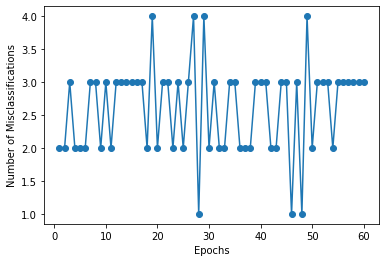

In [182]:
plt.plot(range(1, len(pn.errors)+1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

In [152]:
# pn.weight

array([ 0.30740506,  0.43810016,  0.10007514, -0.031165  ,  0.20134648,
        0.25230565,  0.40581921,  0.16645302, -1.53551899])

In [157]:
pred = pn.predict(X0)
accuracy_score(y,pred)

0.5885416666666666

0.6002604166666666

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?

In [28]:
# class Perceptron(object):
    
#     def __init__(self, rate = 0.01, niter = 10):
#         self.rate = rate
#         self.niter = niter
    
#     def __sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
    
#     def __sigmoid_derivative(self, x):
#         sx = sigmoid(x)
#         return sx * (1-sx)

#     def fit(self, X, y):
#         # Randomly Initialize Weights
#         self.weight = np.zeros(1+X.shape[1])
#         self.bias = np.ones((X.shape[0],1))
#     #adds a bias value of 1 to each observation, so now tey have 9 values
# #        X = np.concatenate((X,self.bias), axis=1)
        
#         # Number of misclassifications
#         self.errors = []

#         for i in range(self.niter):
#             err = 0
#             # Weighted sum of inputs / weights
#             for xi, target in zip(X,y):
#                 delta_w = self.rate * (target - self.predict(xi))
#             # Activate!
##                 self.weight += delta_w * xi
##                 self.bias[0] += delta_w
#             # Cac error
#                 err += int(delta_w)
#             # Update the Weights
#             self.errors.append(err)
#         return self
    
#     def net_input(self, X):
#         return np.dot(X, self.weight) #+ self.bias[0]


#     def predict(self, X):
#         """Return class label after unit step"""
#         return np.where(self.net_input(X) >= 0.5, 1, 0)